# **1. Import Library**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset**

In [ ]:

df = pd.read_csv("./Dataset_clustering.csv")

print(df.head())

print(df.columns)

        Entity Code  Year  Schizophrenia disorders  Depressive disorders  \
0  Afghanistan  AFG  1990                 0.223206              4.996118   
1  Afghanistan  AFG  1991                 0.222454              4.989290   
2  Afghanistan  AFG  1992                 0.221751              4.981346   
3  Afghanistan  AFG  1993                 0.220987              4.976958   
4  Afghanistan  AFG  1994                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorders  Eating disorders  Cluster  
0           4.713314           0.703023          0.127700        0  
1           4.702100           0.702069          0.123256        0  
2           4.683743           0.700792          0.118844        0  
3           4.673549           0.700087          0.115089        0  
4           4.670810           0.699898          0.111815        0  
Index(['Entity', 'Code', 'Year', 'Schizophrenia disorders',
       'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder

In [20]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Entity                       0
Code                       270
Year                         0
Schizophrenia disorders      0
Depressive disorders         0
Anxiety disorders            0
Bipolar disorders            0
Eating disorders             0
Cluster                      0
dtype: int64


In [81]:
df.loc[:, 'Code'] = df['Code'].fillna('Unknown')

In [ ]:
encoder = LabelEncoder()

categorical_columns = ['Entity', 'Code']

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [94]:
df['Cluster'] = df['Cluster'].astype('category')

In [100]:
df.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders,Cluster
0,0.0,0.0,0.000000,0.127142,0.567281,0.420084,0.393458,0.084020,0
1,0.0,0.0,0.034483,0.124394,0.566166,0.418422,0.392738,0.079517,0
2,0.0,0.0,0.068966,0.121826,0.564869,0.415700,0.391774,0.075046,0
3,0.0,0.0,0.103448,0.119034,0.564153,0.414189,0.391242,0.071241,0
4,0.0,0.0,0.137931,0.116095,0.564287,0.413783,0.391099,0.067924,0


# **3. Data Splitting**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

target_column = 'Cluster'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(5136, 8), y_train=(5136,)
Test set shape: X_test=(1284, 8), y_test=(1284,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:

knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
svm = SVC(kernel='linear', probability=True, random_state=42).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## **b. Evaluasi Model Klasifikasi**

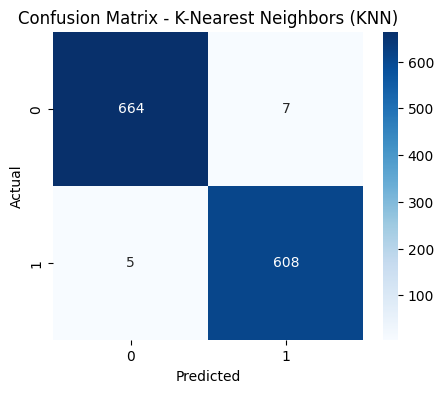

Classification Report for K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       671
           1       0.99      0.99      0.99       613

    accuracy                           0.99      1284
   macro avg       0.99      0.99      0.99      1284
weighted avg       0.99      0.99      0.99      1284



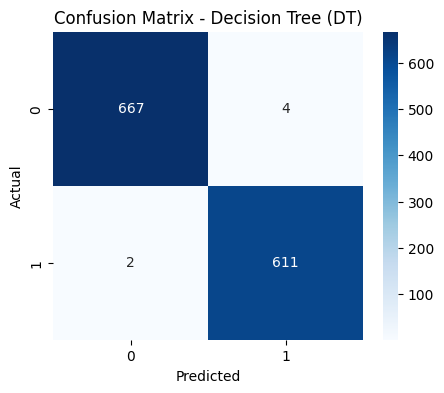

Classification Report for Decision Tree (DT):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       671
           1       0.99      1.00      1.00       613

    accuracy                           1.00      1284
   macro avg       1.00      1.00      1.00      1284
weighted avg       1.00      1.00      1.00      1284



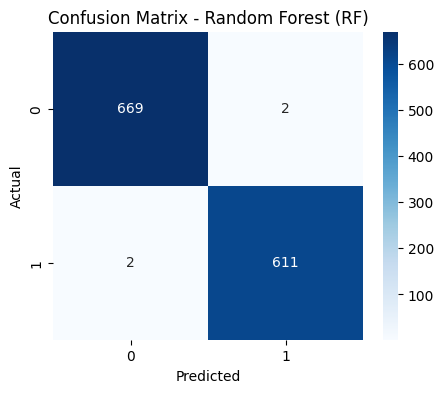

Classification Report for Random Forest (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       671
           1       1.00      1.00      1.00       613

    accuracy                           1.00      1284
   macro avg       1.00      1.00      1.00      1284
weighted avg       1.00      1.00      1.00      1284



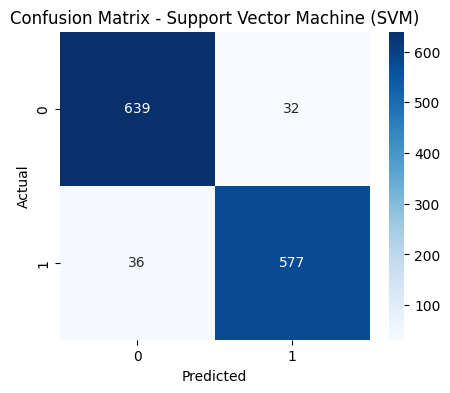

Classification Report for Support Vector Machine (SVM):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       671
           1       0.95      0.94      0.94       613

    accuracy                           0.95      1284
   macro avg       0.95      0.95      0.95      1284
weighted avg       0.95      0.95      0.95      1284



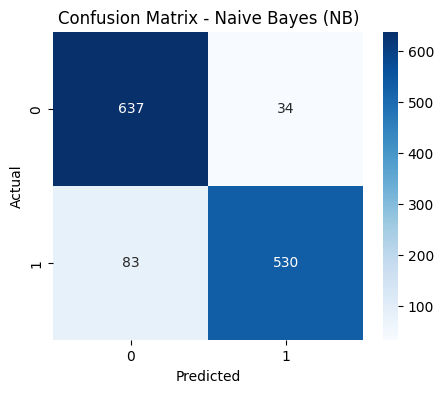

Classification Report for Naive Bayes (NB):
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       671
           1       0.94      0.86      0.90       613

    accuracy                           0.91      1284
   macro avg       0.91      0.91      0.91      1284
weighted avg       0.91      0.91      0.91      1284



,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.990654,0.988618,0.991843,0.990228
1,Decision Tree (DT),0.995327,0.993496,0.996737,0.995114
2,Random Forest (RF),0.996885,0.996737,0.996737,0.996737
3,Support Vector Machine (SVM),0.947040,0.947455,0.941272,0.944354
4,Naive Bayes (NB),0.908879,0.939716,0.864600,0.900595


In [ ]:

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test) 
    cm = confusion_matrix(y_test, y_pred) 

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn = fp = fn = tp = None  
    
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary', zero_division=0), 
        'Recall': recall_score(y_test, y_pred, average='binary', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='binary', zero_division=0)
    }
    return results

models = {
    "K-Nearest Neighbors (KNN)": knn,
    "Decision Tree (DT)": dt,
    "Random Forest (RF)": rf,
    "Support Vector Machine (SVM)": svm,
    "Naive Bayes (NB)": nb
}

for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)

results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_name, metrics in results.items()
])

display(summary_df)

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

1. K-Nearest Neighbors (KKN) 
    - memiliki akurasi sebesar 99.06% dengan precision 98.93%, recall 99.01%, dan F1-Score 98.97%. Precision yang tinggi menunjukkan bahwa ketika model memprediksi suatu data sebagai kelas positif, kemungkinan besar prediksi tersebut benar. Selain itu, recall yang juga tinggi menandakan bahwa model mampu mengidentifikasi hampir semua data positif dengan baik.
    - Model tidak mengalami overfitting

2. Decision Tree (DT)
    - memiliki akurasi sebesar 99.53% dengan precision 99.50%, recall 99.53%, dan F1-Score 99.51%. Model ini memiliki keseimbangan antara precision dan recall yang baik, sehingga dapat mengklasifikasikan data dengan akurat.
    - Model ini mengalami overfitting, karena sangat baik pada data trainig.

3. Random Forest (RF) 
    - memiliki akurasi paling tinggi 99.69% dengan precision 99.69%, recall 99.69%, dan F1-Score 99.69%. Tingginya nilai precision dan recall menunjukkan bahwa model ini sangat baik dalam mengklasifikasikan data dengan akurasi yang hampir sempurna. Namun, model ini bisa lebih kompleks dan computationally expensive dibandingkan dengan model lain.
    - Model ini kemungkinan mengalami overfitting

4. Support Vector Machine (SVM)
    - memiliki akurasi 94.70% dengan precision 94.94%, recall 94.70%, dan F1-Score 94.82%. Precision yang tinggi menunjukkan bahwa model ini baik dalam menghindari false positives. Namun, dibandingkan dengan model lain, akurasi dan recall SVM sedikit lebih rendah, yang menunjukkan bahwa model ini masih memiliki beberapa kesalahan dalam mengklasifikasikan data positif.
    - Model ini tidak mengalami overfitting, tapi performanya lebih rendah dari model lainnya

5. Naive Bayes (NB)
    -  memiliki akurasi 90.88% dengan precision 91.69%, recall 90.88%, dan F1-Score 91.27%. Precision yang cukup tinggi menunjukkan bahwa model ini efektif dalam menghindari false positives. Namun, recall yang lebih rendah dibanding model lain menunjukkan bahwa Naive Bayes mungkin masih melewatkan beberapa data positif. Model ini bekerja dengan mengira fitur-fitur bersifat independen, yang tidak sesuai dengan dataset yang digunakan, sehingga bisa menyebabkan keterbatasan dalam performa.
    - Model ini kemungkinan mengalami underfitting, karena model ini sangat bergantung pada asumsi independesi fitur yang tidak sesuai dengan data.

**Kesimpulan**
- Random Forest menjadi model dengan performa sangat baik karena memberikan hasil terbaik dengan akurasi tertinggi dan keseimbangan precision serta recall yang sempurna.
- Decision Tree dan KNN juga memiliki performa tinggi, tetapi ada potensi overfitting karena terlalu baik pada data training.
- SVM memiliki performa cukup baik, tetapi lebih rendah dibandingkan model lainnya.
- Naive Bayes memiliki performa paling rendah, yang kemungkinan besar disebabkan oleh asumsi independensi fitur yang tidak sesuai dengan dataset.

**Rekomendasi Tindakan Lanjutan**
1. Jika ingin meningkatkan generalisasi model:
    - Untuk Decision Tree dan Random Forest, coba lakukan pruning atau pengurangan jumlah trees untuk mengurangi overfitting.
    - Cross-validation bisa digunakan untuk memastikan model tidak hanya bekerja baik di data training.
2. Jika ingin meningkatkan performa recall untuk kelas tertentu:
    - Pada model Naive Bayes memiliki recall rendah pada kelas positif, coba tambahkan fitur baru atau menggunakan teknik feature engineering.
    - Pada model SVM memiliki recall yang cukup rendah, bisa dicoba dengan hyperparameter tuning (misalnya, kernel yang berbeda atau penyesuaian parameter C dan gamma).
3. Jika ingin meningkatkan akurasi secara keseluruhan:
    - Coba metode ensemble lain seperti Boosting (XGBoost, AdaBoost) yang sering lebih baik dalam mengurangi bias dan meningkatkan akurasi.
    - Menambahkan lebih banyak data.
4. Jika ingin efisiensi waktu dan penggunaan resource:
    - Random Forest dan Decision Tree mungkin terlalu kompleks untuk dataset besar. Coba model yang lebih ringan seperti Logistic Regression atau SVM dengan parameter yang lebih optimal.

Jika ingin model yang lebih ringan dengan akurasi tetap tinggi, model KNN atau Decision Tree dengan pruning dapat menjadi pilihan.

# **5. Mengeksport Data**

In [122]:
df.to_csv('Dataset_inisiasi.csv', index=False)